# __Introduction__:
As the automobile gradually becomes the necessity of every family, the car insurance also becomes more and more prosperous for auto insurance companies, to maximize revenue, they must sell corresponding insurance plans to different customers. However, because the types of customers are so diverse and the correlation between the characteristics is not obvious, the use of simple statistics cannot enable insurance companies to make accurate judgments about customers. With the advent of machine learning, more models are available to learn data in depth. Thus, more accurate predictions can be achieved.

# __Problem Statement__:
Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.


# __Objective__:

### We aim to solve the problem statement by creating a plan of action, laid down are some of the necessary steps:

1. Data Ingestion
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Feature Selection/Extraction
5. Predictive Modelling
6. Project Outcomes & Conclusion

## _Dataset Attributes_:

1.	__policy_id__: The unique identifier for each insurance policy.

2.	__policy_tenure__: The length of time (in years) that the policy has been active.

3.	__age_of_car__: The age of the insured car (in years) at the time the policy was taken.

4.	__age_of_policyholder__: The age of the policyholder (in years) at the time the policy was taken.

5.	__area_cluster__: A categorical variable representing the cluster or category to which the area of residence belongs.

6.	__population_density__: A measure of the population density of the area where the policyholder resides.

7.	__Make__:  The make or manufacturer of the insured car.

8.	__segment__: The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).

9.	__model__: The specific model or variant of the insured car.

10.	__fuel_type__: The type of fuel used by the insured car (e.g., petrol, diesel, electric).

11.	__max_torque__: The maximum torque output of the car's engine.

12.	__max_power__: The maximum power output of the car's engine.

13.	__engine_type__: The type of engine used in the insured car (e.g., inline, V-type).

14.	__airbags__: The number of airbags installed in the car.

15.	__is_esc__: A binary variable indicating whether the car has an electronic stability control (ESC) system.

16.	__is_adjustable_steering__: A binary variable indicating whether the car has adjustable steering.

17.	__is_tpms__: A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).

18.	__is_parking_sensors__: A binary variable indicating whether the car has parking sensors.

19.	__is_parking_camera__: A binary variable indicating whether the car has a parking camera.

20.	__rear_brakes_type__: The type of rear brakes used in the car.

21.	__displacement__: The engine displacement of the car (typically measured in liters or cubic centimeters).

22.	__cylinder__: The number of cylinders in the car's engine.

23.	__transmission_type__: The type of transmission used in the car (e.g., manual, automatic).

24.	__gear_box__: The number of gears in the car's gearbox.

25.	__steering_type__: The type of steering system used in the car.

26.	__turning_radius__: The minimum radius of the circular path that the car can make.

27.	__length__: The length of the car.

28.	__width__: The width of the car.

29.	__height__: The height of the car.

30.	__gross_weight__: The gross weight or total weight of the car.

31.	__is_front_fog_lights__: A binary variable indicating whether the car has front fog lights.

32.	__is_rear_window_wiper__: A binary variable indicating whether the car has a rear window wiper.

33.	__is_rear_window_washer__: A binary variable indicating whether the car has a rear window washer.

34.	__is_rear_window_defogger__: A binary variable indicating whether the car has a rear window defogger.

35.	__is_brake_assist__: A binary variable indicating whether the car has a brake assist system.

36.	__is_power_door_locks__: A binary variable indicating whether the car has power door locks.

37.	__is_central_locking__: A binary variable indicating whether the car has central locking.

38.	__is_power_steering__: A binary variable indicating whether the car has power steering.

39.	__is_driver_seat_height_adjustable__: A binary variable indicating whether the driver's seat height is adjustable.

40.	__is_day_night_rear_view_mirror__: A binary variable indicating whether the car has a day/night rearview mirror

41.	__is_ecw__: A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.

42.	__is_speed_alert__: A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.

43.	__ncap_rating__: The safety rating of the car according to the New Car Assessment Program (NCAP). NCAP is a government-backed program that evaluates and rates the safety performance of new car models in various crash tests and assessments. The rating is usually represented by a star system, with a higher number of stars indicating a better safety performance.

44.	__is_claim__: A binary variable indicating whether an insurance claim has been filed for the car policy. This variable determines whether an insurance event has occurred for a given policy, with a value of 1 indicating that a claim was filed and 0 indicating no claim was filed.


In [1]:
# Importing basic analytical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

# 1. Data Ingestion

In [2]:
# Importing Dataset
dataset = pd.read_csv('Insurance_data.csv')
df = dataset.copy()

In [3]:
# Dataset exploration
def exploring_dataset(data):
    print('')
    print('\x1b[1;41m************************************Data_Head************************************')
    display(data.head())
    print('')
    print('\x1b[1;41m************************************Data_Tail************************************')
    display(data.tail())
    print('')
    print('\x1b[1m************************************Data_Info************************************')
    display(data.info())
    print('')
    print('\x1b[1;41m************************************Unique Rows************************************')
    display(data.nunique().sort_values())
    print('')
    print('\x1b[1;41m************************************Data_Missing_Values************************************')
    display(data.isnull().sum().sort_values(ascending=False))
    print('')
    print('\x1b[1;41m************************************Data_Describe************************************')
    display(data.describe())
exploring_dataset(df)


************************************Data_Head************************************


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.52,0.05,0.64,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.67,0.02,0.38,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.84,0.02,0.38,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.90,0.11,0.43,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.60,0.11,0.63,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0



************************************Data_Tail************************************


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.36,0.13,0.64,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.20,0.02,0.52,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.16,0.05,0.45,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.24,0.14,0.56,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.12,0.02,0.44,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0



************************************Data_Info************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-nul

None


************************************Unique Rows************************************


cylinder                                2
transmission_type                       2
gear_box                                2
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
rear_brakes_type                        2
is_brake_assist                         2
is_central_locking                      2
is_power_steering                       2
is_driver_seat_height_adjustable        2
is_day_night_rear_view_mirror           2
is_ecw                                  2
is_speed_alert                          2
is_power_door_locks                     2
is_parking_camera                       2
is_claim                                2
is_tpms                                 2
is_adjustable_steering                  2
is_parking_sensors                      2
is_esc                                  2
airbags                                 3
steering_type                     


************************************Data_Missing_Values************************************


policy_id                           0
policy_tenure                       0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
gear_box                            0
transmission_type                   0
cylinder                            0
max_torque                          0
age_of_car                          0
age_of_polic


************************************Data_Describe************************************


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00
mean,0.61,0.07,0.47,18826.86,1.76,3.14,1162.36,3.63,5.25,4.85,3850.48,1672.23,1553.34,1385.28,1.76,0.06
std,0.41,0.06,0.12,17660.17,1.14,1.83,266.30,0.48,0.43,0.23,311.46,112.09,79.62,212.42,1.39,0.24
min,0.00,0.00,0.29,290.00,1.00,1.00,796.00,3.00,5.00,4.50,3445.00,1475.00,1475.00,1051.00,0.00,0.00
25%,0.21,0.02,0.37,6112.00,1.00,2.00,796.00,3.00,5.00,4.60,3445.00,1515.00,1475.00,1185.00,0.00,0.00
50%,0.57,0.06,0.45,8794.00,1.00,2.00,1197.00,4.00,5.00,4.80,3845.00,1735.00,1530.00,1335.00,2.00,0.00
75%,1.04,0.11,0.55,27003.00,3.00,6.00,1493.00,4.00,5.00,5.00,3995.00,1755.00,1635.00,1510.00,3.00,0.00
max,1.40,1.00,1.00,73430.00,5.00,6.00,1498.00,4.00,6.00,5.20,4300.00,1811.00,1825.00,1720.00,5.00,1.00


* __Checking null values through heatmap__

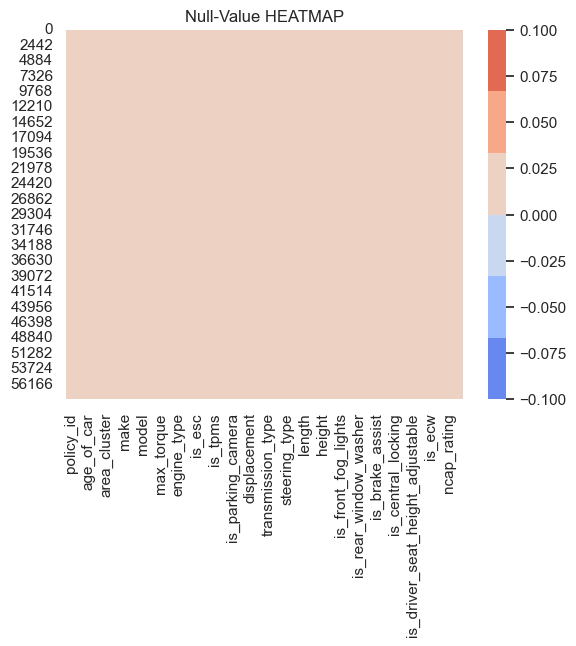

In [4]:
sns.heatmap(df.isnull(),cmap=sns.color_palette('coolwarm'))
plt.title('Null-Value HEATMAP')
plt.show()

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

In [6]:
# Dropping "Policy ID" column not required
df.drop(columns='policy_id',inplace=True)

# 2. Exploratory Data Analysis (EDA)

In [7]:
# Segregating features and target variable
target = 'is_claim'
labels = ['Not Claimed', 'Claimed']
features = [i for i in df.columns.values if i not in target]

In [8]:
# Segregating features and target variable coulmn names
unnq = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if unnq.values[i]<=7:cf.append(unnq.index[i])
    else: nf.append(unnq.index[i])

# Re-allocating correct dtypes as per categorical and numerical features
cf.extend(['max_power','max_torque', 'model', 'engine_type', 'area_cluster'])
nf = df[nf].select_dtypes(exclude='object').columns.values.tolist()
cf.remove('airbags')
nf.append('airbags')

nnf = len(nf); ncf = len(cf)
print('\n\x1b[7mInference:\x1b[0m The Datset has {} numerical & {} categorical features.'.format(nnf,ncf))


Inference: The Datset has 11 numerical & 31 categorical features.


          	  Target Variable Distribution          


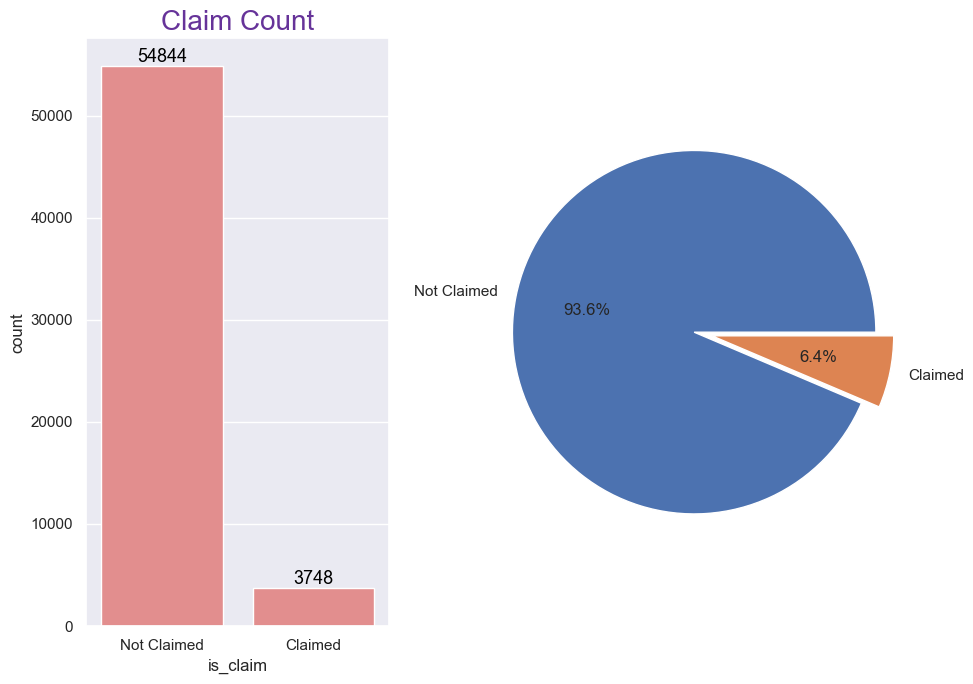

In [9]:
MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
# MAP={0:'Not-Claimed',1:'Claimed'}
df[target]=df[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.15
print('\033[7m\t  Target Variable Distribution'.center(55))

fig = plt.subplots(nrows=1,ncols=2,figsize=(10, 7))
plt.subplot(1,2,1)
plots = sns.barplot(df[target].value_counts(),color='lightcoral')
for bar in plots.patches:
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='bottom',
                   size=13,color='black')
plt.title("Claim Count",fontdict={'fontsize':20,'color':'rebeccapurple'})

plt.subplot(1,2,2)
plt.pie(df[target].value_counts(), labels=df[target].value_counts().index, counterclock=True,explode=explode, autopct='%1.1f%%',radius=1.5)
plt.tight_layout()
plt.show()

#### From the above visualization we can conclude that only 6.4% of policyholder of total record data has claimed.

### Visualising the Categorical features

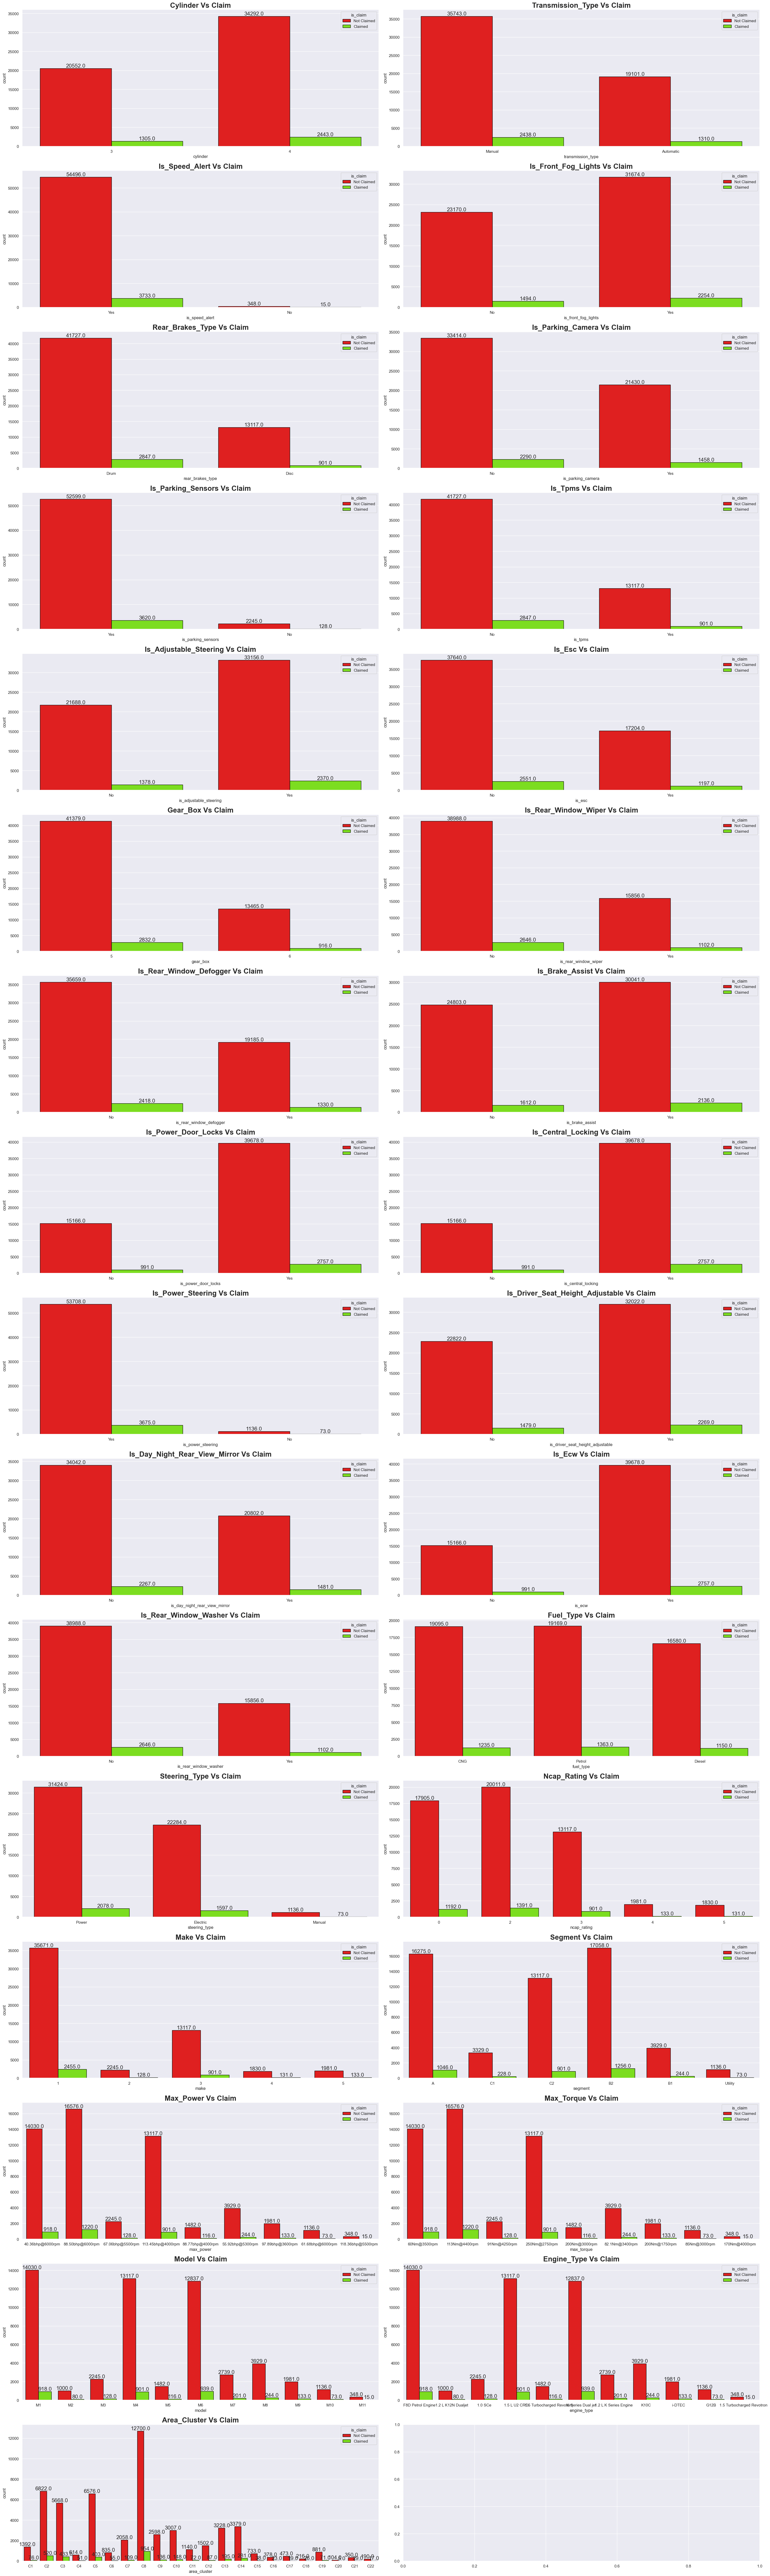

In [10]:
colors=['red', 'lawngreen']
fig = plt.subplots(nrows=16, ncols=2, figsize=(30,100))
for n,column in enumerate(cf):
    plot=plt.subplot(16,2,n+1)
    ax = sns.countplot(x=cf[n], data=df, hue=target, palette=colors, edgecolor='black')
    for rect in ax.patches:
        if rect.get_xy() != (0,0):
            ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                ha='center',va='bottom',fontdict={'fontsize':15})
            title = cf[n] + ' vs Claim'
            plt.title(title.title(),fontdict={'fontsize':20}, weight='bold');
    plt.tight_layout()
plt.show()

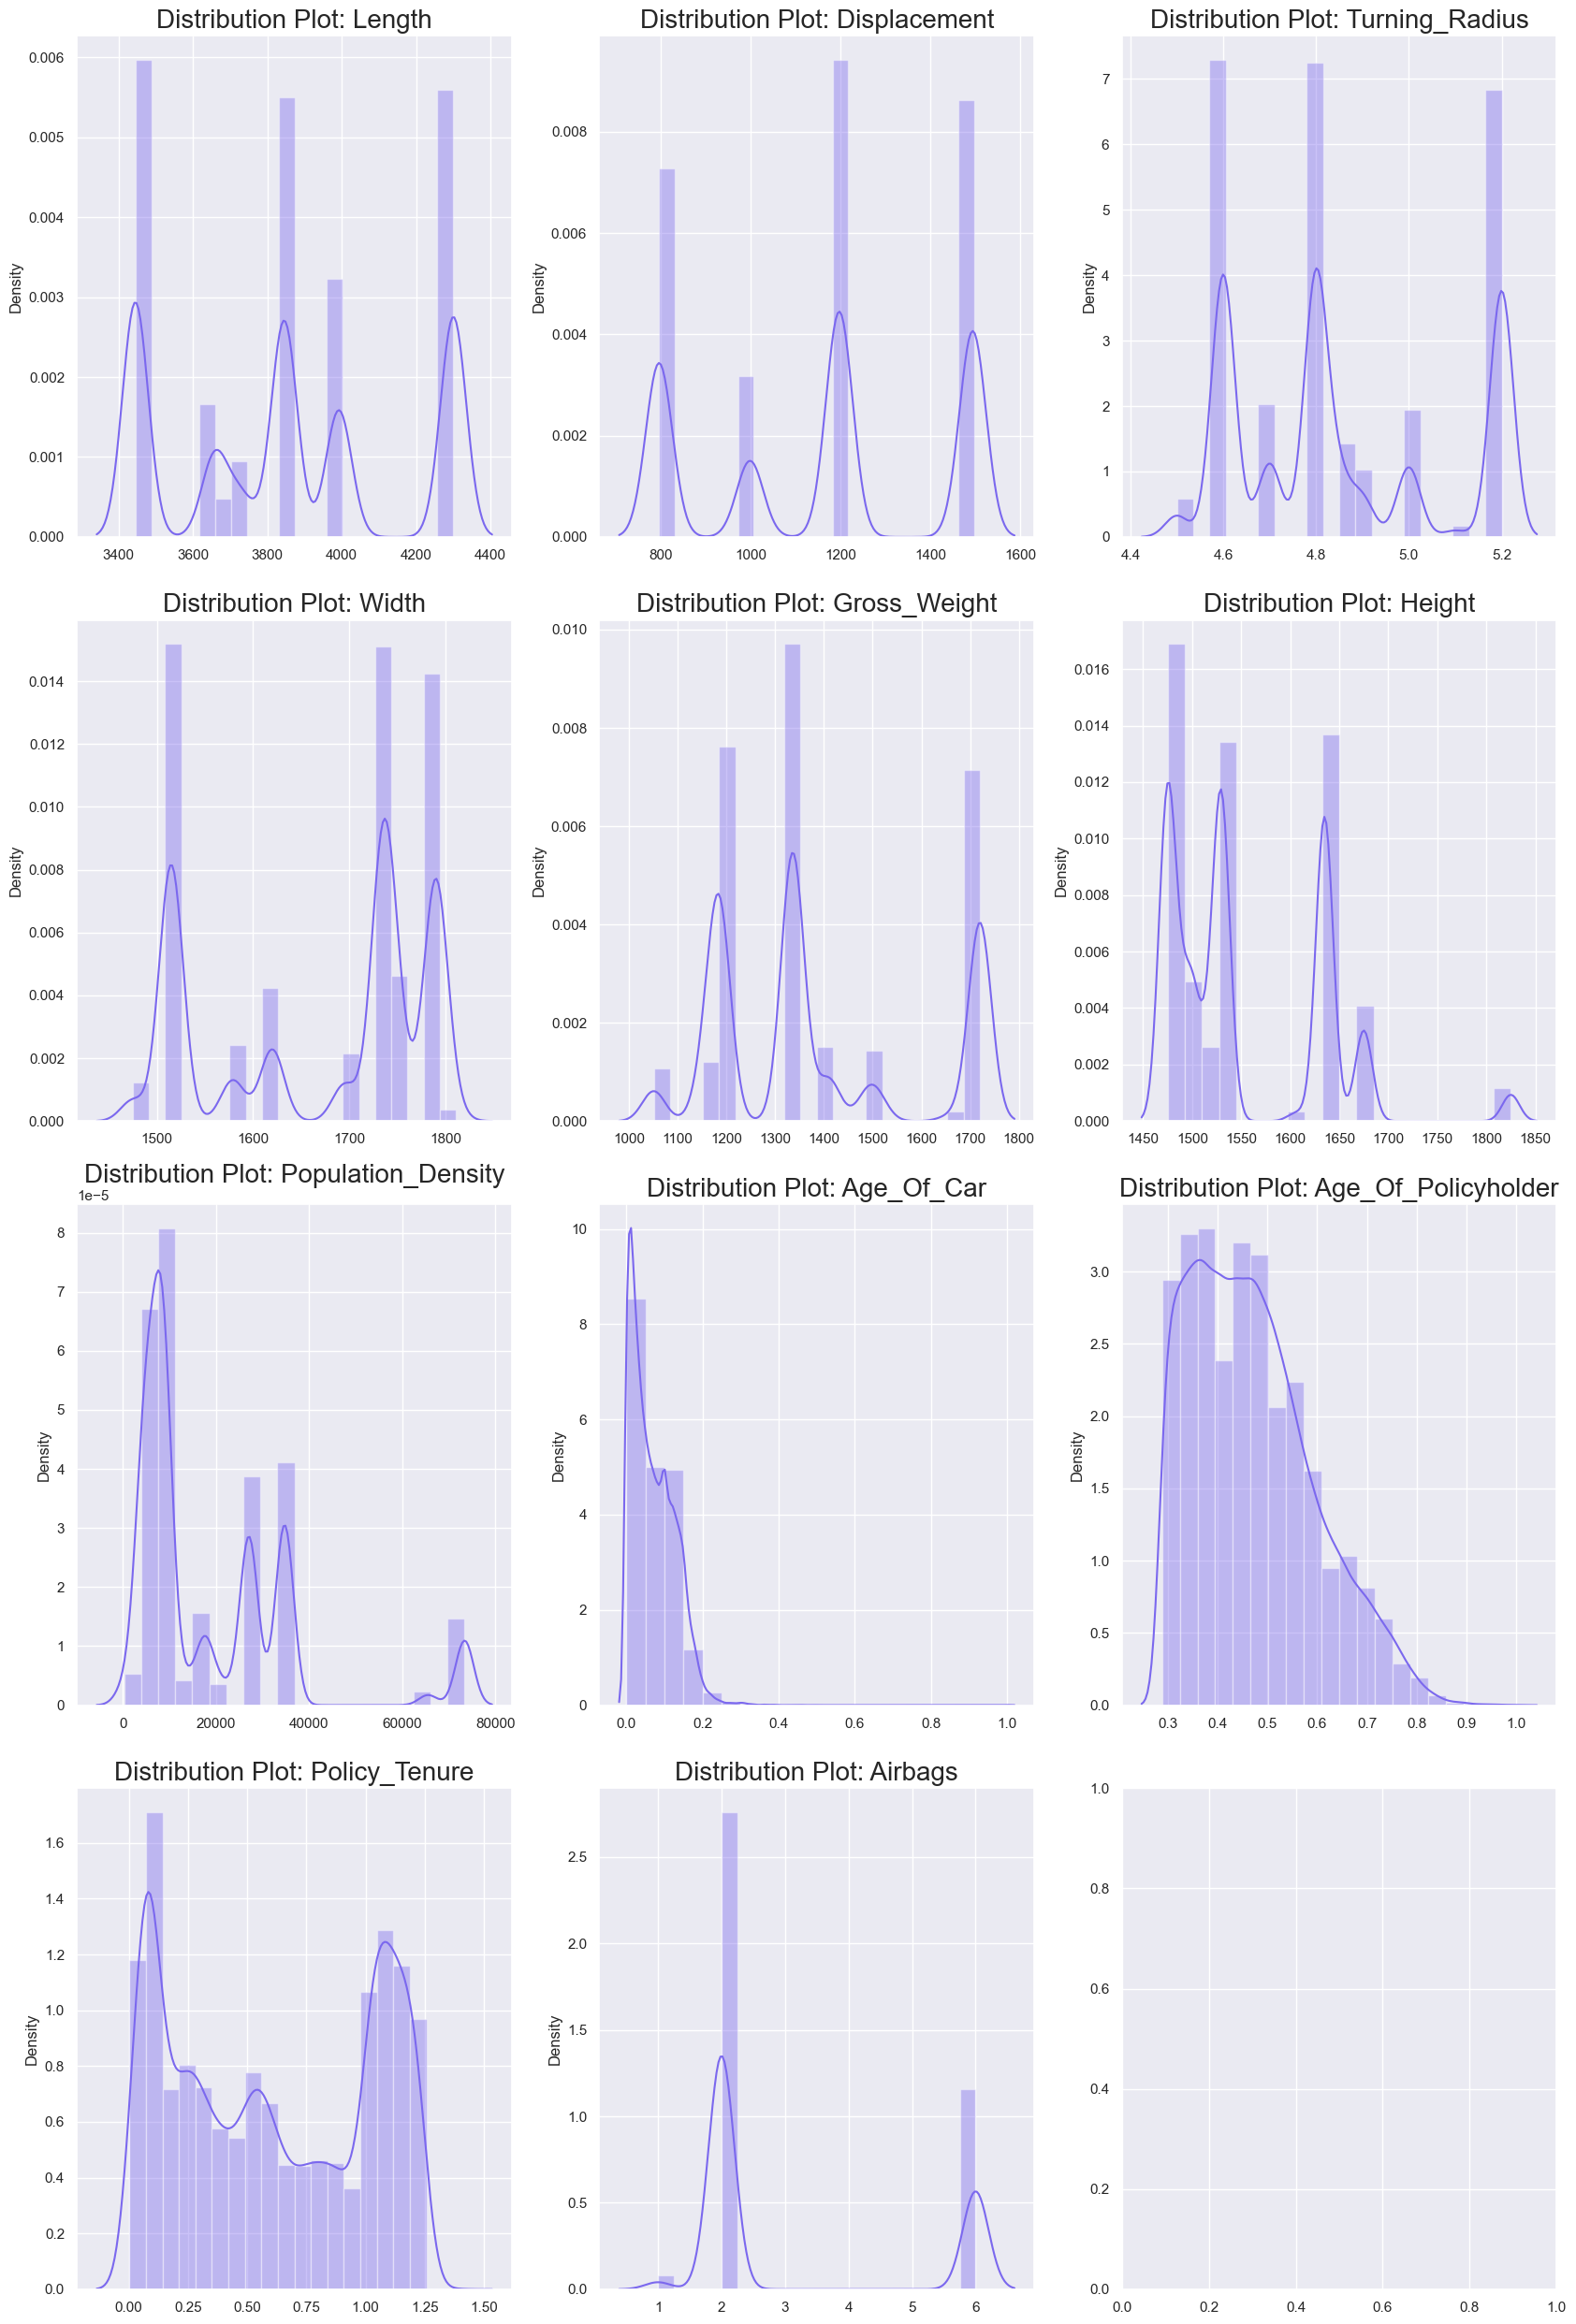

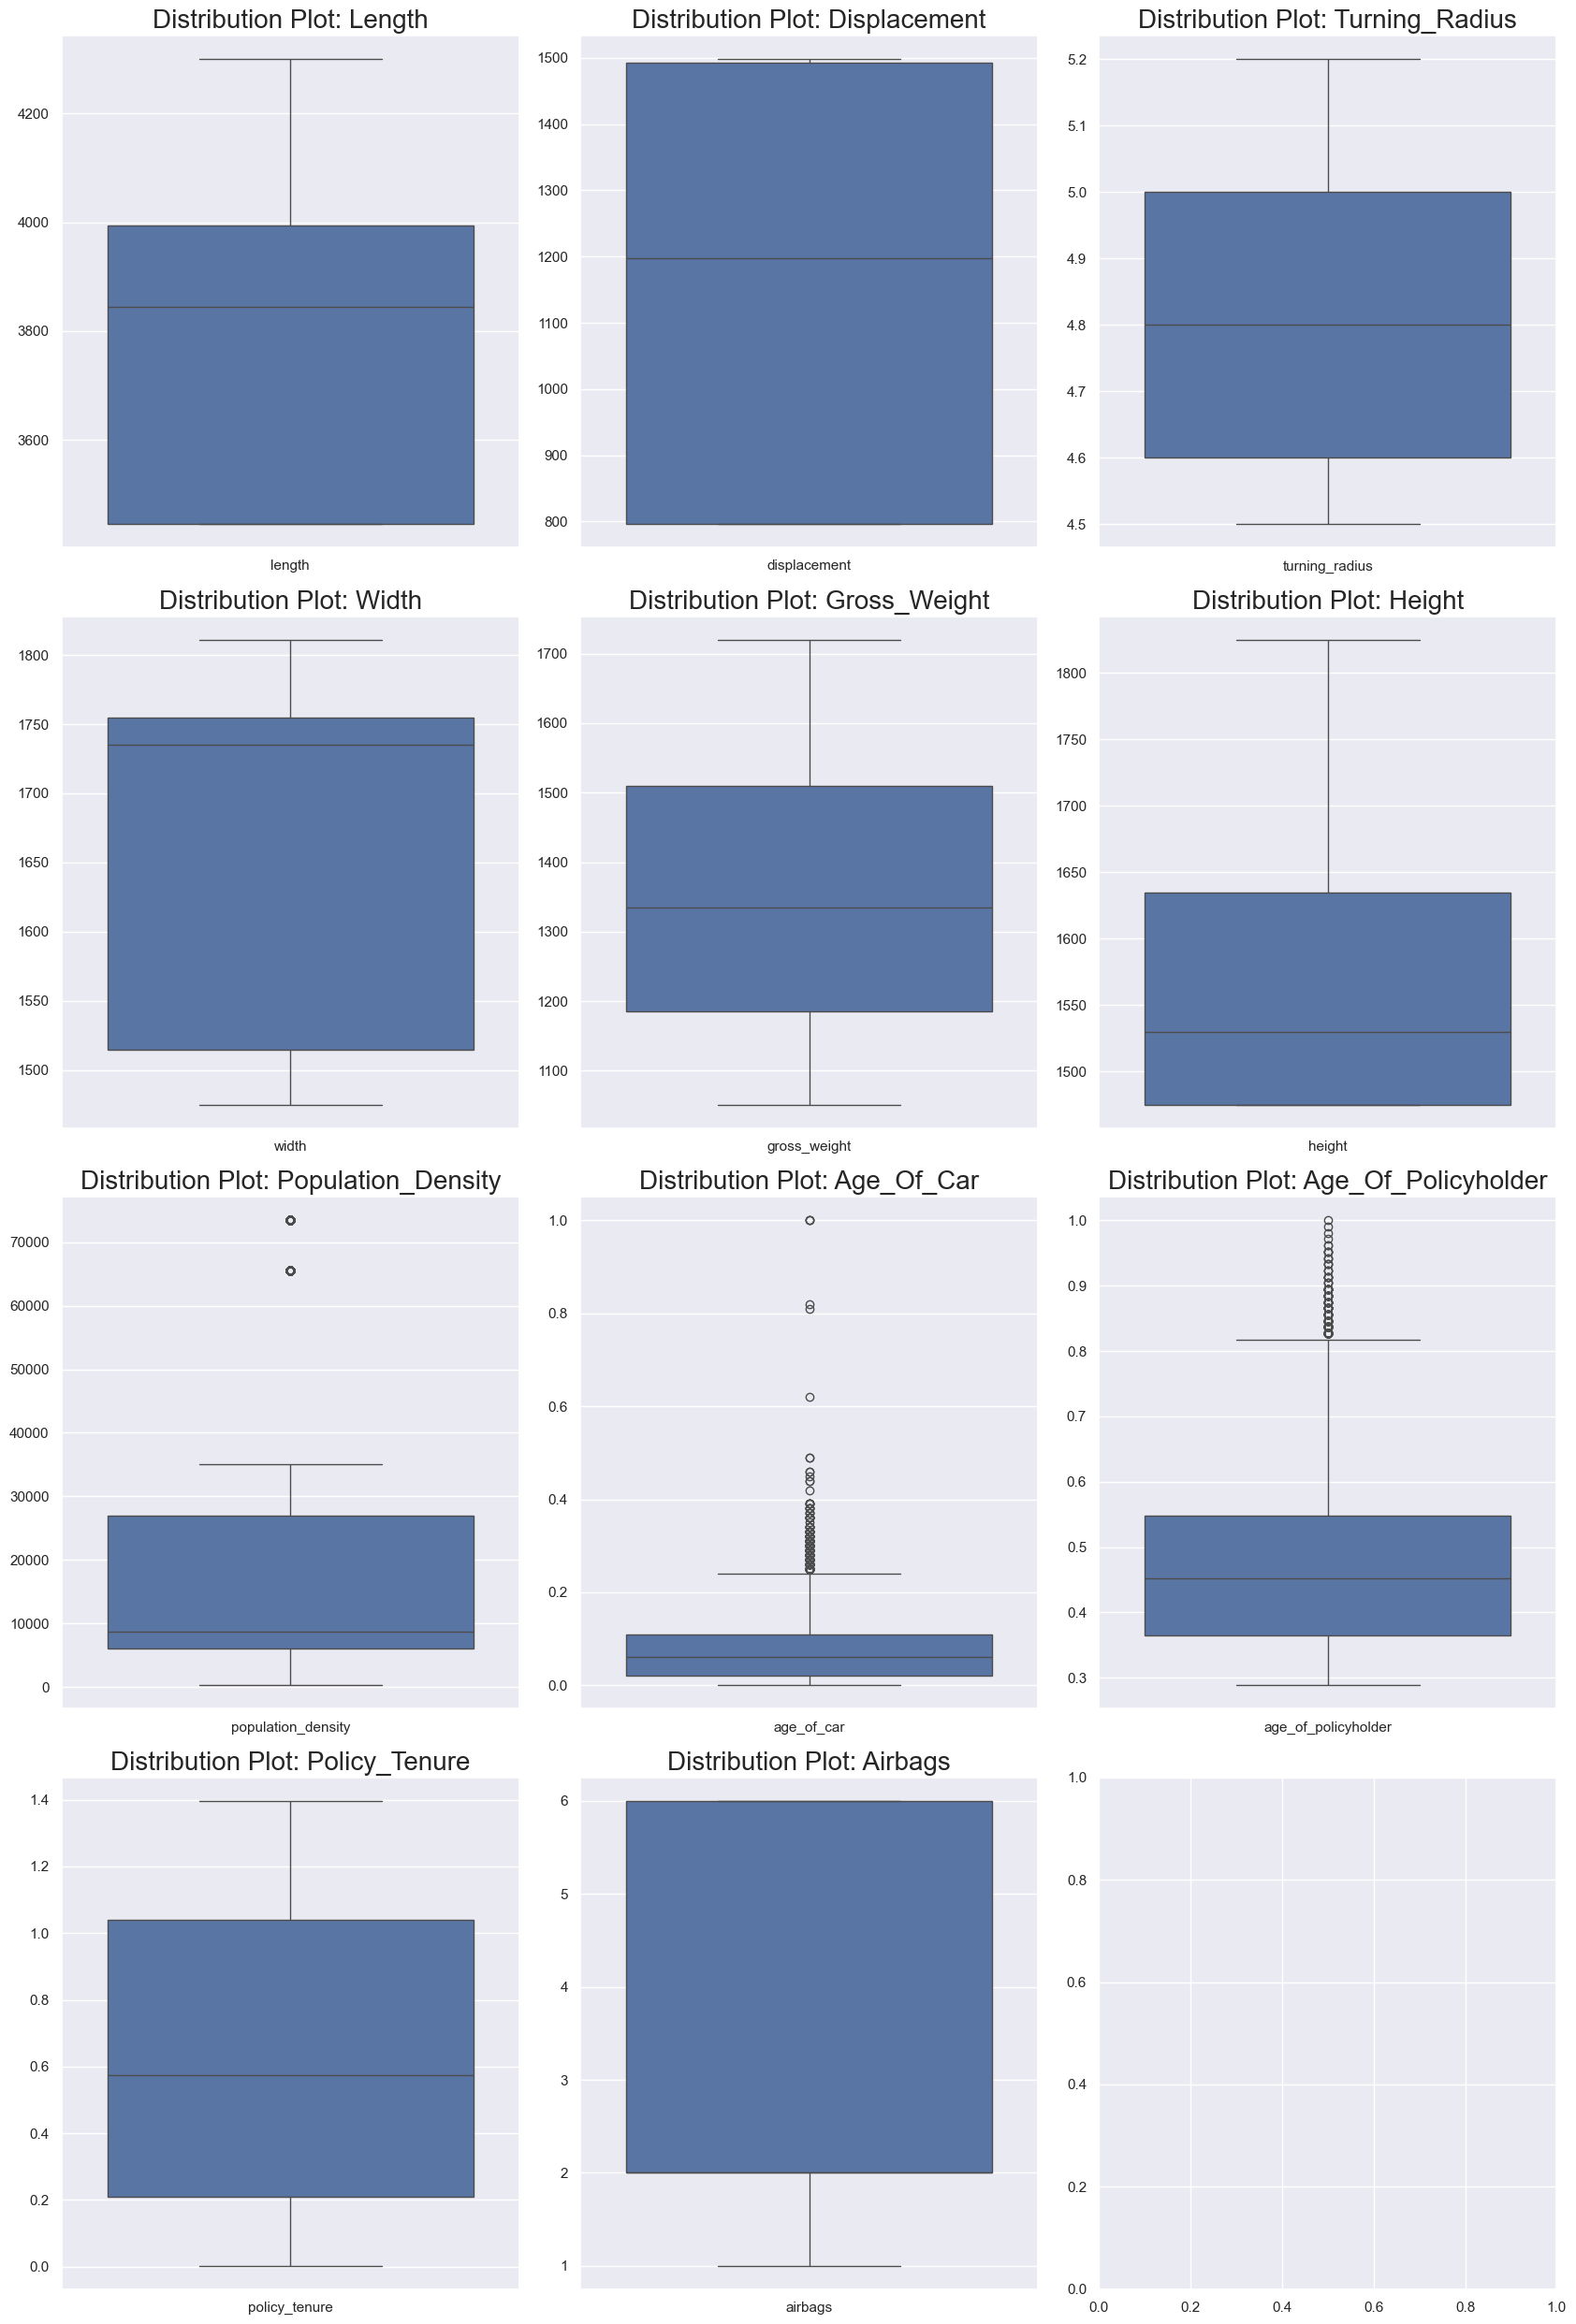

In [11]:
fig = plt.subplots(nrows=4,ncols=3,figsize=(17,25))
for n,column in enumerate(nf):
    plt.subplot(4,3,n+1)
    sns.distplot(df[[nf[n]]],color='mediumslateblue',bins=20)
    title = 'Distribution plot: '+nf[n]
    plt.title(title.title(),fontdict={'fontsize':20})
plt.tight_layout()
plt.show()

fig = plt.subplots(nrows=4,ncols=3,figsize=(17,25))
for n,column in enumerate(nf):
    plt.subplot(4,3,n+1)
    sns.boxplot(df[[nf[n]]])
    title = 'Distribution plot: '+nf[n]
    plt.title(title.title(),fontdict={'fontsize':20})
plt.tight_layout()
plt.show()

* ___The above distribution plot and box plot shows features 'Population Density', 'Age of Car' and 'Age of policy holder' have outliers.___

# 3. Data Pre-Processing

In [12]:
# Outlier Treatment
for col in ['population_density', 'age_of_car', 'age_of_policyholder']:
    Q3 = np.quantile(a=df[col],q=0.75)
    Q1 = np.quantile(a=df[col],q=0.25)
    iqr = Q3 - Q1
    UL = Q3 + 1.5*iqr
    LL = Q1 - 1.5*iqr
    df[col].clip(lower=LL,upper=UL,inplace=True)

In [13]:
# Sorting categorical columns out of numerical columns for label encoding
text_data_features = [i for i in df.columns if i not in df.describe().columns]
print(text_data_features)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'is_claim']


In [14]:
# Label Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in text_data_features:
    df[i] = le.fit_transform(df[i])
    print(i,':',df[i].unique(),'=',le.inverse_transform(df[i].unique()))

area_cluster : [ 0 11 15 16 17 18 19 20 21  1  2  3  4  5  6  7  8  9 10 12 13 14] = ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
segment : [0 3 4 2 1 5] = ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model : [ 0  3  4  5  6  7  8  9 10  1  2] = ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type : [0 2 1] = ['CNG' 'Petrol' 'Diesel']
max_torque : [5 0 8 4 3 6 2 7 1] = ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
max_power : [2 6 5 0 7 3 8 4 1] = ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
engine_type : [ 6  2  0  3  4  8  1  9 10  7  5] = ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series

In [15]:
# Reversing label encoding for claims
df.is_claim.replace({1:0,0:1},inplace=True)

In [16]:
df.describe().T[df.describe().T['mean']>10]

,count,mean,std,min,25%,50%,75%,max
area_cluster,58592.00,13.04,6.80,0.00,6.00,15.00,20.00,21.00
population_density,58592.00,17953.59,15146.18,290.00,6112.00,8794.00,27003.00,58339.50
displacement,58592.00,1162.36,266.30,796.00,796.00,1197.00,1493.00,1498.00
length,58592.00,3850.48,311.46,3445.00,3445.00,3845.00,3995.00,4300.00
width,58592.00,1672.23,112.09,1475.00,1515.00,1735.00,1755.00,1811.00
height,58592.00,1553.34,79.62,1475.00,1475.00,1530.00,1635.00,1825.00
gross_weight,58592.00,1385.28,212.42,1051.00,1185.00,1335.00,1510.00,1720.00


In [17]:
scale_index = np.where([df.describe().T['mean']>100])[1].tolist()
scale_index

[4, 19, 25, 26, 27, 28]

In [18]:
# Standard scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,[4, 19, 25, 26, 27, 28]] = scaler.fit_transform(df.iloc[:,[4, 19, 25, 26, 27, 28]])

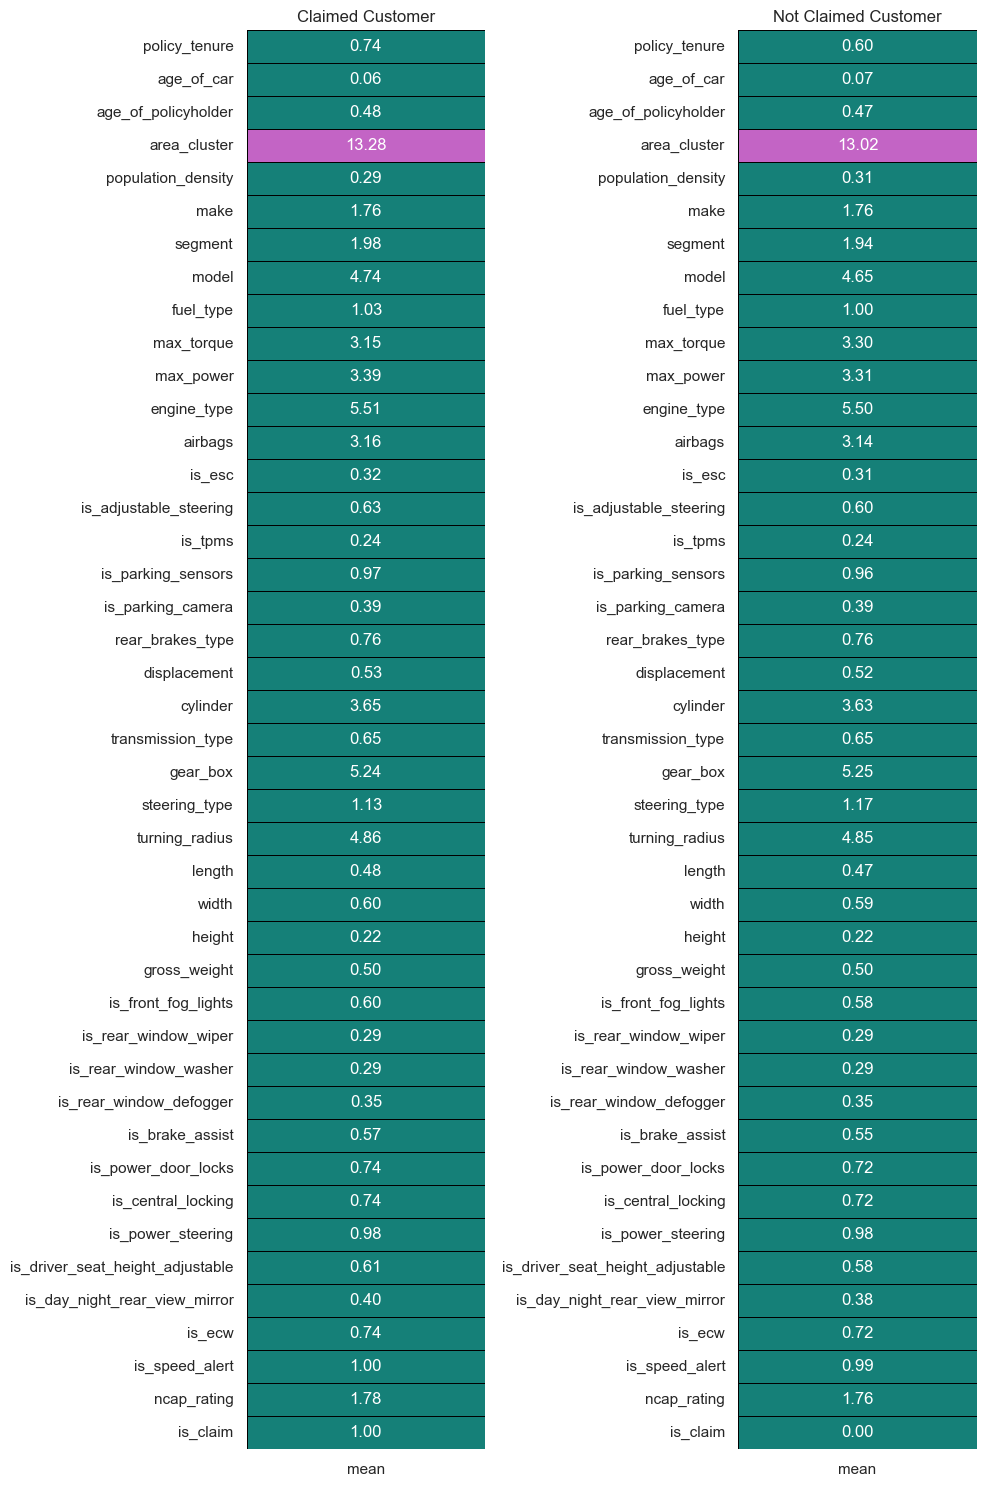

In [19]:
# Visualising mean of features for Claimed and Not_Claimed customers through heatmap
colors = ['#158078', '#C364C5']

claim = df[df['is_claim']==1].describe().T
not_claim = df[df['is_claim']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,15))
plt.subplot(1,2,1)
sns.heatmap(claim[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Claimed Customer')

plt.subplot(1,2,2)
sns.heatmap(not_claim[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Claimed Customer')

fig.tight_layout(pad=1)

* __Observing the correlation of each of the features in the dataset using heatmap__

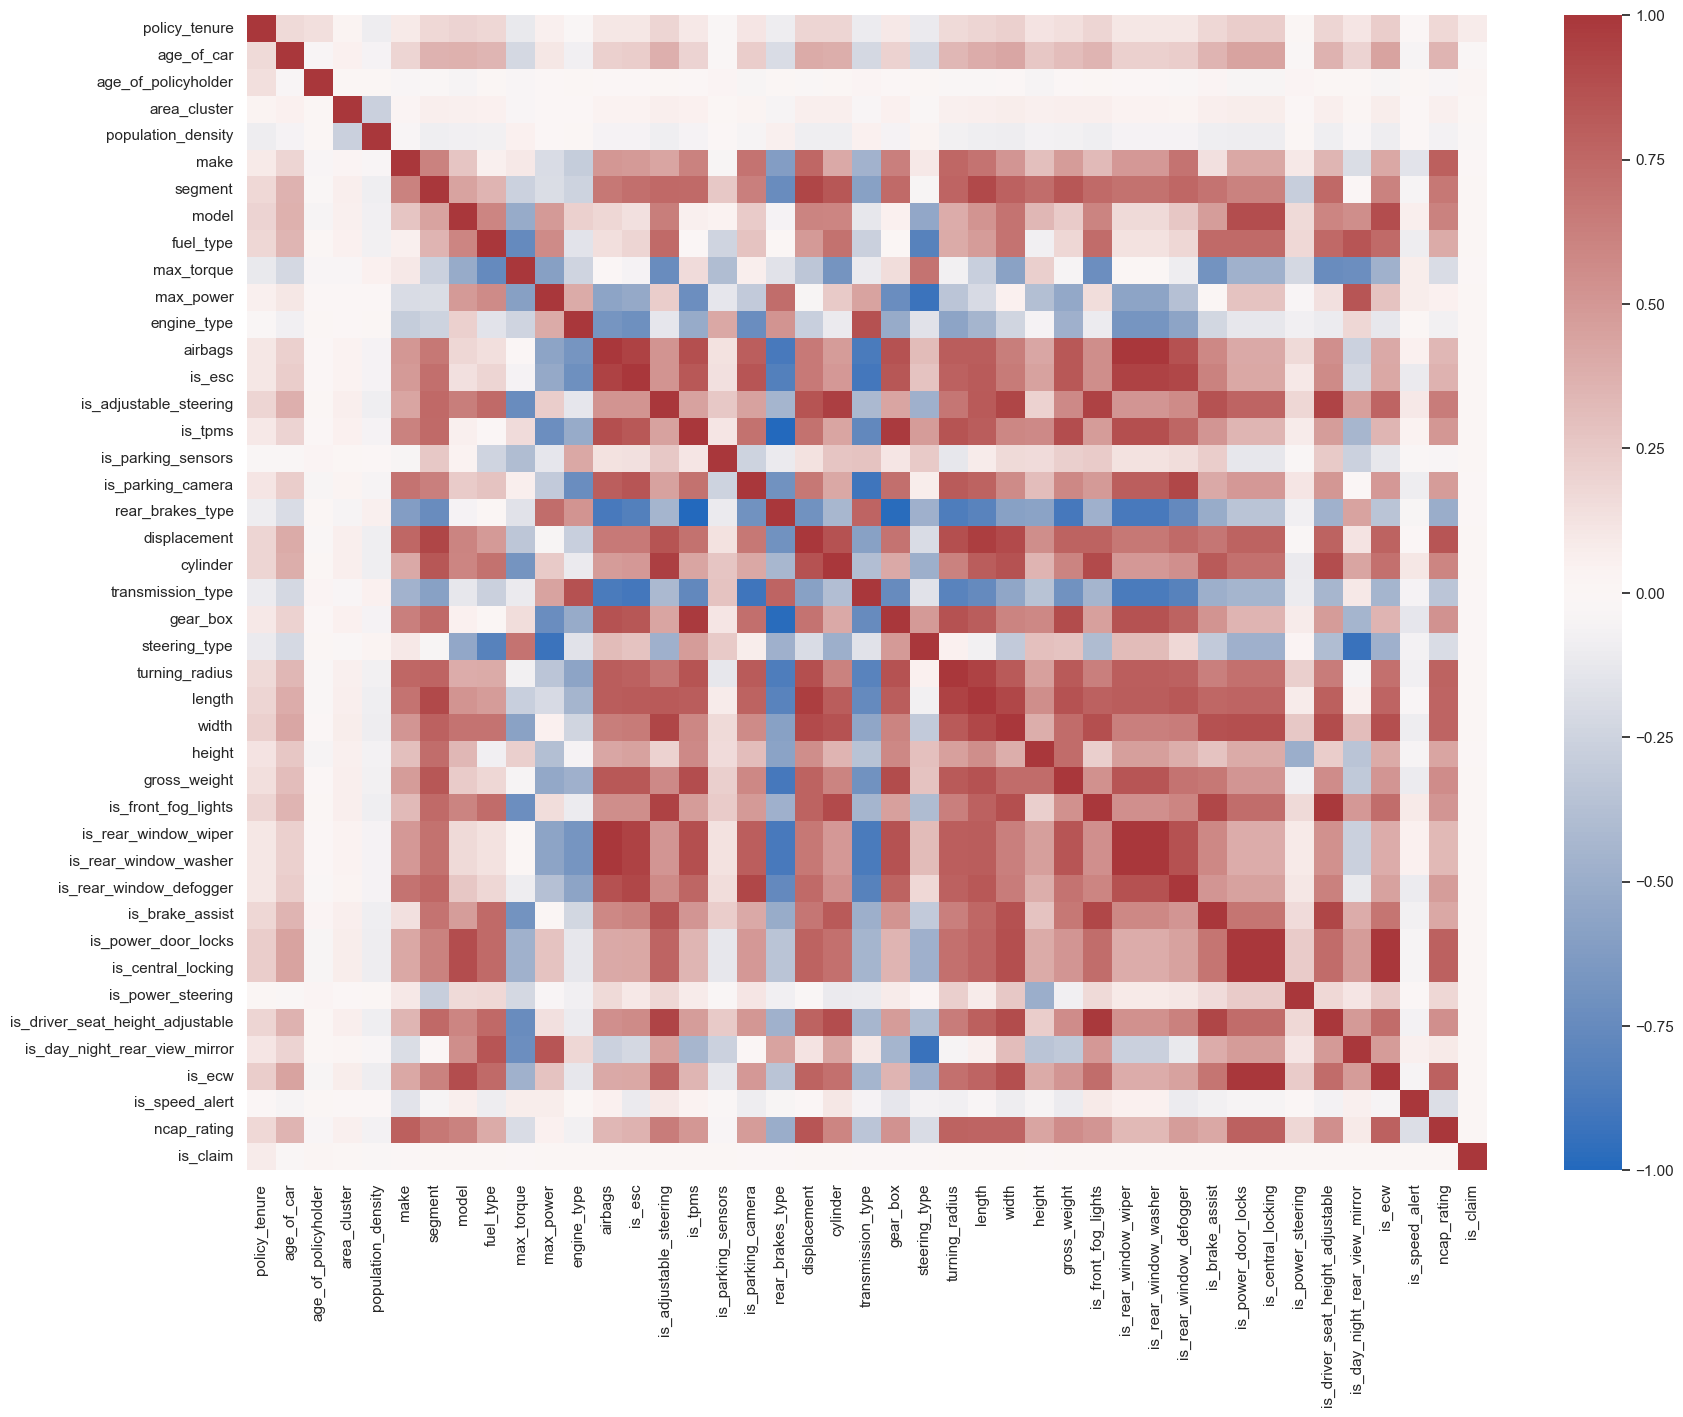

In [20]:
# Correlation of the dataset
sns.heatmap(df.corr(),cmap=sns.color_palette("vlag", as_cmap=True),figure = plt.figure(figsize=(20,15)))
plt.show()

* __Correlation of independent features vs dependent features__

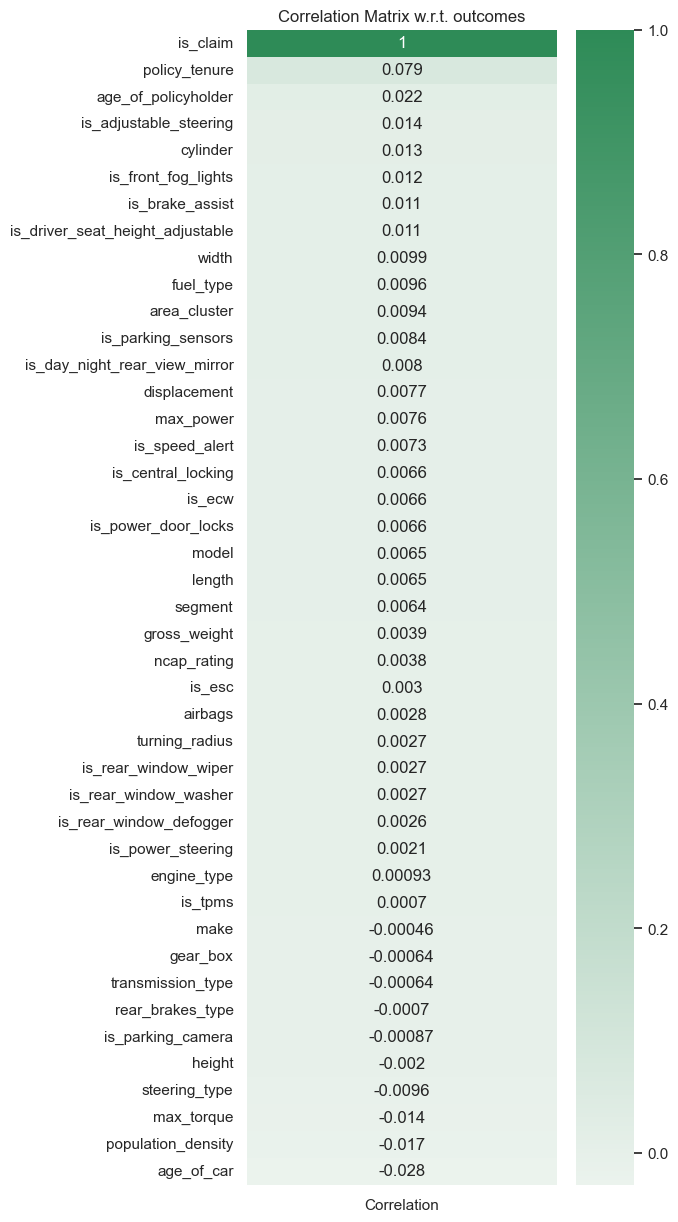

In [21]:
corr = df.corrwith(df['is_claim']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap=sns.light_palette('seagreen', as_cmap=True))
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

# 4. Feature Selection/Extraction

### Feature Importance of categorical fields using Chi-Square method
* Here we are segregating categorical features that are heavily impacting the Claims (dependent variable) and will remove features that are least impacting.

In [22]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

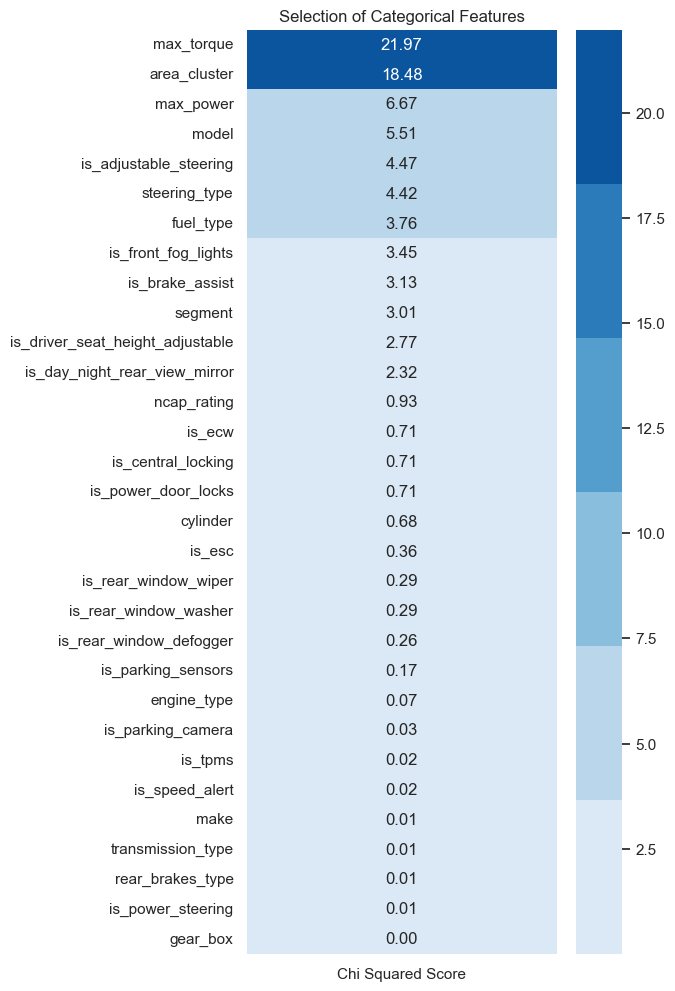

In [23]:
# Heatmap of categorical features
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(df[cf], df[target])

featureScores_1 = pd.DataFrame(data = fit.scores_, index= fit.feature_names_in_,
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,12))
sns.heatmap(featureScores_1.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = sns.color_palette("Blues"), fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

* ___From the above feature selection of categorical columns using Chi-Square test, we can observe that the features 'max_torque' and 'area_cluster' is highly impacting the Claims (dependent variable) whereas 'gear_box', 'power_steering', 'rear_brakes_type' etc. being the least important.___

### Feature Importance of numerical fields using ANOVA testing
* Here we are segregating numerical features that are heavily impacting the Claims (dependent variable) and will remove features that are least impacting.

In [24]:
# Imporing ANOVA feature selection
from sklearn.feature_selection import f_classif

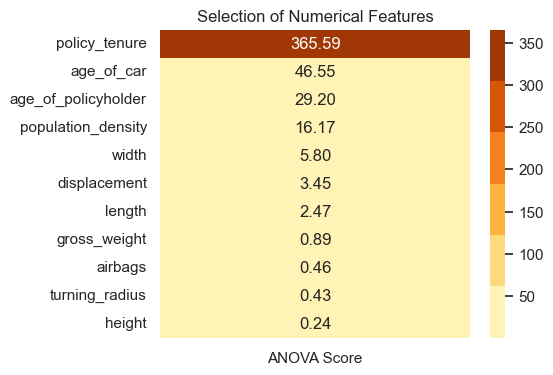

In [25]:
# Heatmap of numerical features
best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(df[nf], df[target])

featureScores_2 = pd.DataFrame(data = fit.scores_, index= fit.feature_names_in_,
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,4))
sns.heatmap(featureScores_2.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = sns.color_palette("YlOrBr"), fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

* ___From the above feature selection of numerical columns using ANOVA test, we can observe that the feature 'policy_tenure' is highly impacting the Claims (dependent variable) whereas 'height', 'turning_radius', 'airbags' etc. being the least important.___

In [26]:
# Removing less important independent variables
df.drop(columns=featureScores_1[featureScores_1['Chi Squared Score']<0.1].index,inplace=True)
df.drop(columns=featureScores_2[featureScores_2['ANOVA Score']<1].index,inplace=True)

In [27]:
df['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

* __In the above analysis, we understood that our dataset is imbalanced and hence we fixed the same using SMOTE technique.__

  _In Layman's terms - SMOTE technique is used to balance the number of counts for both the classes (0 and 1). Hence in the below cell we can find out that the data is now balanced._ 

In [28]:
# Handling imbalance dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
f1 = df.iloc[:,:-1]
t1 = df.iloc[:,-1]
f1,t1 = smote.fit_resample(f1,t1)

# 5. Predictive Modelling

In [29]:
# Model Building
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve,RocCurveDisplay, auc

In [30]:
x_train, x_test, y_train, y_test = train_test_split(f1,t1, test_size=0.2, random_state=101)

In [46]:
def model_eval(*classifier):
    for estimator in classifier:
        print()
        print('**********************',str(type(estimator)).split('.')[-1][:-2],'*******************')
        print(' ')
        estimator.fit(x_train, y_train)
        cm = confusion_matrix(y_test,estimator.predict(x_test))
        names= ['True Negative','False Positive','False Negative','True Positive']
        counts = [value for value in cm.flatten()]
        percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cm, annot=labels, cmap='Blues',fmt='')
        print(classification_report(y_test,estimator.predict(x_test)))
        plt.show()

* #### Here I have chosen 5 Machine Learning algorithms. Comments are mentioned as per the Classifiers.

In [32]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=300, min_samples_split=5,min_samples_leaf=4,
                          max_depth=5000, bootstrap=True,max_features='sqrt',criterion="entropy",random_state=5)

In [33]:
# XGBoost Classifier
from xgboost import XGBClassifier
XGBoost = XGBClassifier(learning_rate=0.01,n_estimators=500)

In [34]:
# LightGBM Classifier
from lightgbm import LGBMClassifier
LightGBM = LGBMClassifier(learning_rate=0.01, n_estimators=500,force_col_wise=True)

In [35]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
Gaussian_Naive_Bayes = GaussianNB()

In [36]:
# CatBoost Classifier
from catboost import CatBoostClassifier
Cat_Boost = CatBoostClassifier(learning_rate=0.01,eval_metric='AUC',logging_level='Silent')

In [37]:
from sklearn.svm import SVC
SVM_Classifier = SVC()


********************** RandomForestClassifier *******************
 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     10926
           1       0.89      0.91      0.90     11012

    accuracy                           0.90     21938
   macro avg       0.90      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938



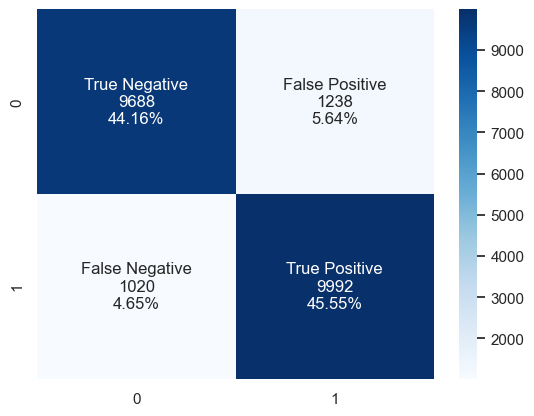


********************** XGBClassifier *******************
 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10926
           1       0.93      0.81      0.86     11012

    accuracy                           0.87     21938
   macro avg       0.88      0.87      0.87     21938
weighted avg       0.88      0.87      0.87     21938



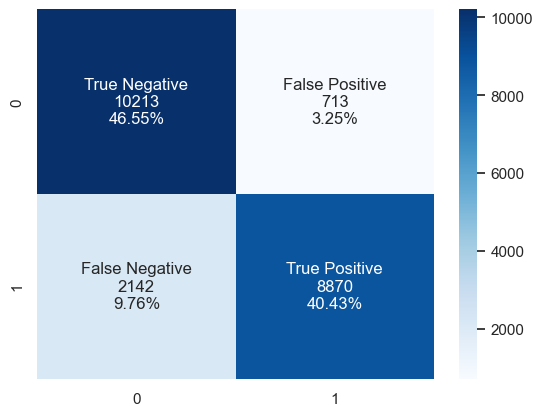


********************** LGBMClassifier *******************
 
[LightGBM] [Info] Number of positive: 43832, number of negative: 43918
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 87750, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499510 -> initscore=-0.001960
[LightGBM] [Info] Start training from score -0.001960
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     10926
           1       0.98      0.86      0.92     11012

    accuracy                           0.92     21938
   macro avg       0.93      0.92      0.92     21938
weighted avg       0.93      0.92      0.92     21938



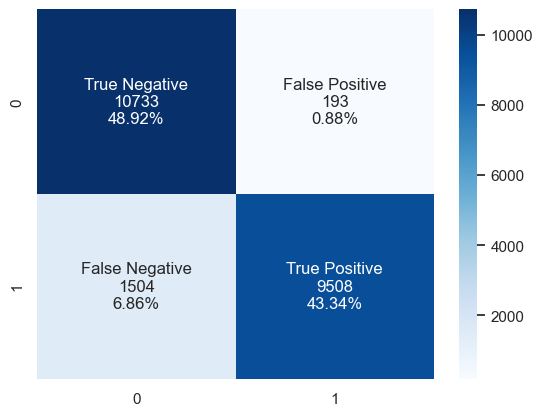


********************** GaussianNB *******************
 
              precision    recall  f1-score   support

           0       0.58      0.53      0.56     10926
           1       0.57      0.62      0.60     11012

    accuracy                           0.58     21938
   macro avg       0.58      0.58      0.58     21938
weighted avg       0.58      0.58      0.58     21938



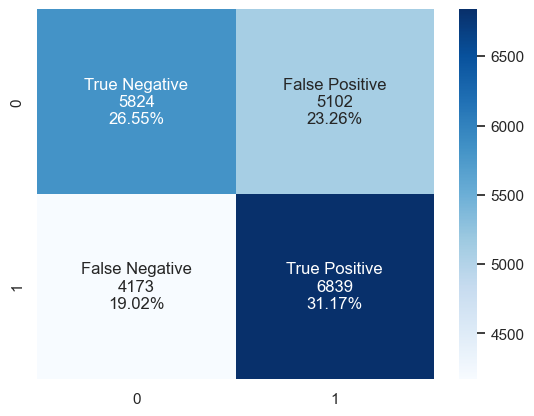


********************** CatBoostClassifier *******************
 
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     10926
           1       0.98      0.88      0.93     11012

    accuracy                           0.93     21938
   macro avg       0.94      0.93      0.93     21938
weighted avg       0.94      0.93      0.93     21938



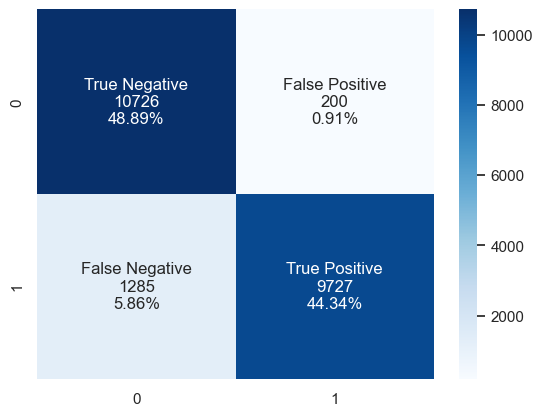

In [47]:
model_eval(Random_Forest,XGBoost,LightGBM,Gaussian_Naive_Bayes,Cat_Boost)

* __Above information depicts the classification report where we can establish the fact that LGBMClassifier, Cat Boosting and Random Forest Classifier technique gives us the max accuracy whereas Gaussian Naive Bayes being the least__
* Confusion matrix is represented using heatmap.

### Fitting the dataset into the models.

In [39]:
Random_Forest.fit(x_train, y_train)
XGBoost.fit(x_train, y_train)
LightGBM.fit(x_train, y_train)
Cat_Boost.fit(x_train,y_train)
Gaussian_Naive_Bayes.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 43832, number of negative: 43918
[LightGBM] [Info] Total Bins 1162
[LightGBM] [Info] Number of data points in the train set: 87750, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499510 -> initscore=-0.001960
[LightGBM] [Info] Start training from score -0.001960


GaussianNB()

In [40]:
rf_probs = Random_Forest.predict_proba(x_test)[:,1]
xgb_probs = XGBoost.predict_proba(x_test)[:,1]
lgbm_probs = LightGBM.predict_proba(x_test)[:,1]
nb_probs = Gaussian_Naive_Bayes.predict_proba(x_test)[:,1]
cat_probs = Cat_Boost.predict_proba(x_test)[:,1]

In [41]:
rf_auc = roc_auc_score(y_test,rf_probs) * 100
xgb_auc = roc_auc_score(y_test,xgb_probs) * 100
lgbm_auc = roc_auc_score(y_test,lgbm_probs) * 100
nb_auc = roc_auc_score(y_test,nb_probs) * 100
cat_auc = roc_auc_score(y_test,cat_probs) * 100

In [42]:
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test,rf_probs)
xgb_fpr,xgb_tpr,xgb_threshold = roc_curve(y_test,xgb_probs)
lgbm_fpr,lgbm_tpr,lgbm_threshold = roc_curve(y_test,lgbm_probs)
nb_fpr,nb_tpr,nb_threshold = roc_curve(y_test,nb_probs)
cat_fpr,cat_tpr,cat_threshold = roc_curve(y_test,cat_probs)

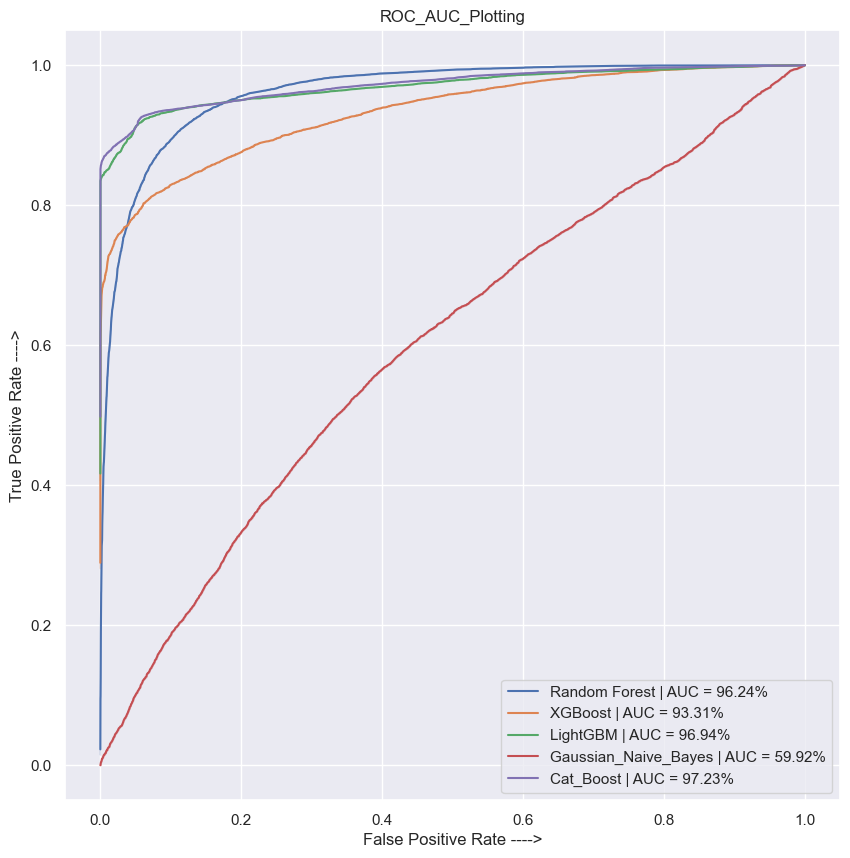

In [43]:
plt.figure(figsize=(10,10))
sns.lineplot(x=rf_fpr,y=rf_tpr,label='Random Forest | AUC = {:.2f}%'.format(rf_auc))
sns.lineplot(x=xgb_fpr,y=xgb_tpr,label='XGBoost | AUC = {:.2f}%'.format(xgb_auc))
sns.lineplot(x=lgbm_fpr,y=lgbm_tpr,label='LightGBM | AUC = {:.2f}%'.format(lgbm_auc))
sns.lineplot(x=nb_fpr,y=nb_tpr,label='Gaussian_Naive_Bayes | AUC = {:.2f}%'.format(nb_auc))
sns.lineplot(x=cat_fpr,y=cat_tpr,label='Cat_Boost | AUC = {:.2f}%'.format(cat_auc))
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.title("ROC_AUC_Plotting")
plt.legend()
plt.show()

# <u> What we started with?
* We started with a sample of dataset related to insurance industry where the problem statement was to classify the customers who will claim for insurance based on numerical and categorical features. Along with we also had to explore the dataset and on analyze whether the data is imbalanced. We had certain dataset attributes where each features described its dependency on the final outcome.

# <u> What we observed and course of actions initiated?
* The very first step involved data ingestion and a clear understanding of metadata, that is knowing data about the data where I get to know the dataset attributes, it’s outline analysis, count of total records, finding null/missing values, understanding features and segregating independent variable to target dependency.
Formal proceedings included data cleaning where importing of basic analytical and visualisation libraries (like numpy, pandas, seaborn, etc).
We imported the dataset into Jupyter notebook and check for the missing values. Dropped missing data where necessary. Encoded the categorical columns using label encoder and scaled the numerical columns. I also checked for any imbalances in the dataset, fixed using oversampling technique called SMOTE and outliers were treated using outlier treatment.
Correlations were drawn out with each of the independent features with respect to Churn data (dependent column) and using sklearn’s feature importance technique I able to drop the least important features for better model prediction.

# <u> Conclusion
* Here I have used 5 of the machine learning classifiers — RandomForest, XGBoosting, LGBMClassifier, Cat Boosting and Gaussian Naive Bayes out of which CatBoosting Classifier proved to provide the best accuracy score. We can see the same in the ROC_AUC curve where the area under the same is maximum, that is 97.20%.